In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

In [11]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [12]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [13]:
data = pd.merge(transactions, customers, on='CustomerID')


In [14]:
data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15


In [15]:
df = data.groupby('CustomerID').agg({
    'TotalValue': ['sum', 'mean'],  # Total and average spending
    'TransactionID': 'count',  # Frequency of transactions
    'Quantity': 'sum',  # Total quantity purchased
}).reset_index()

In [16]:
df

CustomerID TotalValue              TransactionID Quantity
                      sum         mean         count      sum
0        C0001    3354.52   670.904000             5       12
1        C0002    1862.74   465.685000             4       10
2        C0003    2725.38   681.345000             4       14
3        C0004    5354.88   669.360000             8       23
4        C0005    2034.24   678.080000             3        7
..         ...        ...          ...           ...      ...
194      C0196    4982.88  1245.720000             4       12
195      C0197    1928.65   642.883333             3        9
196      C0198     931.83   465.915000             2        3
197      C0199    1979.28   494.820000             4        9
198      C0200    4758.60   951.720000             5       16

[199 rows x 5 columns]

In [17]:
df.columns = ['CustomerID', 'TotalSpending', 'AverageSpending', 'Frequency', 'TotalQuantity']


In [18]:
df1 = customers[['CustomerID', 'Region', 'SignupDate']]
df = pd.merge(df, df1, on='CustomerID')

In [19]:
df['SignupYear'] = pd.to_datetime(df['SignupDate']).dt.year


In [20]:
df.head()

,CustomerID,TotalSpending,AverageSpending,Frequency,TotalQuantity,Region,SignupDate,SignupYear
0,C0001,3354.52,670.904,5,12,South America,2022-07-10,2022
1,C0002,1862.74,465.685,4,10,Asia,2022-02-13,2022
2,C0003,2725.38,681.345,4,14,South America,2024-03-07,2024
3,C0004,5354.88,669.360,8,23,South America,2022-10-09,2022
4,C0005,2034.24,678.080,3,7,Asia,2022-08-15,2022


In [21]:
df = pd.get_dummies(df, columns=['Region'], drop_first=True)


In [22]:
df.head()

,CustomerID,TotalSpending,AverageSpending,Frequency,TotalQuantity,SignupDate,SignupYear,Region_Europe,Region_North America,Region_South America
0,C0001,3354.52,670.904,5,12,2022-07-10,2022,False,False,True
1,C0002,1862.74,465.685,4,10,2022-02-13,2022,False,False,False
2,C0003,2725.38,681.345,4,14,2024-03-07,2024,False,False,True
3,C0004,5354.88,669.360,8,23,2022-10-09,2022,False,False,True
4,C0005,2034.24,678.080,3,7,2022-08-15,2022,False,False,False


In [23]:
x=[]
for col in df.columns:
    if 'Region_' in col:
        x.append(col)

features = ['TotalSpending', 'AverageSpending', 'Frequency', 'TotalQuantity', 'SignupYear'] + x
print(features)


['TotalSpending', 'AverageSpending', 'Frequency', 'TotalQuantity', 'SignupYear', 'Region_Europe', 'Region_North America', 'Region_South America']


In [24]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

In [25]:
scaled_features

array([[-0.06170143, -0.07026341, -0.01145819, ..., -0.57928445,
        -0.54831888,  1.54041597],
       [-0.87774353, -0.93493297, -0.46749414, ..., -0.57928445,
        -0.54831888, -0.6491753 ],
       [-0.40585722, -0.02627131, -0.46749414, ..., -0.57928445,
        -0.54831888,  1.54041597],
       ...,
       [-1.38697529, -0.93396389, -1.37956603, ...,  1.72626765,
        -0.54831888, -0.6491753 ],
       [-0.81399315, -0.81217559, -0.46749414, ...,  1.72626765,
        -0.54831888, -0.6491753 ],
       [ 0.70636652,  1.11292648, -0.01145819, ..., -0.57928445,
        -0.54831888, -0.6491753 ]])

In [26]:
inertia = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

In [27]:
silhouette_scores

[0.2116835267503179,
 0.22570773061492636,
 0.2424552004849008,
 0.2494057500057198,
 0.24668946296685632,
 0.23652752019111623,
 0.2402064341983784,
 0.23533766492941957,
 0.26453635448047186]

In [28]:
inertia

[1218.2261082322652,
 1027.0920555241614,
 893.1719335214452,
 755.2944958919393,
 694.1199811017639,
 674.0058625246629,
 605.7363413595888,
 567.748068327458,
 514.6668836764794]

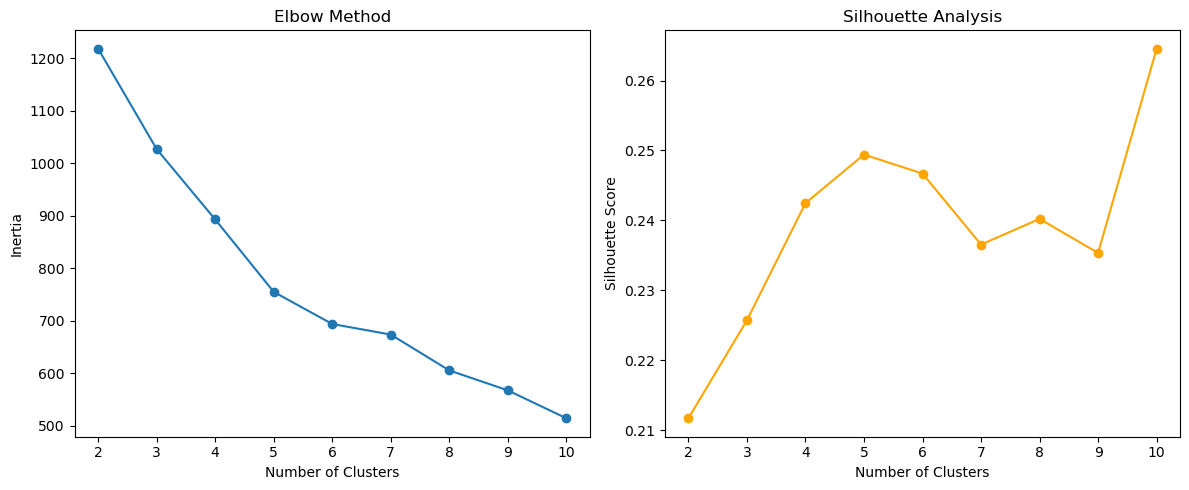

In [29]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [30]:

optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(scaled_features)

df['Cluster_KMeans'] = labels


In [31]:
db_index = davies_bouldin_score(scaled_features, labels)
print(f"Davies-Bouldin Index: {db_index:.4f}")


Davies-Bouldin Index: 1.4024


In [32]:
param_grid = {
        'n_clusters': range(2, 11),
        'init': ['k-means++', 'random'],
        'n_init': [10, 20, 30],
        'max_iter': [200, 300, 500]
    }

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans


In [34]:
def custom_scorer(estimator, X):
    labels = estimator.labels_
    return silhouette_score(X, labels)

In [35]:
kmeans = KMeans(random_state=42)
grid_search = GridSearchCV(
            kmeans,
            param_grid,
            scoring=custom_scorer,
            cv=[(slice(None), slice(None))],  # No CV splitting for clustering
            verbose=1
        )

In [36]:
grid_search.fit(scaled_features)


Fitting 1 folds for each of 162 candidates, totalling 162 fits


GridSearchCV(cv=[(slice(None, None, None), slice(None, None, None))],
             estimator=KMeans(random_state=42),
             param_grid={'init': ['k-means++', 'random'],
                         'max_iter': [200, 300, 500],
                         'n_clusters': range(2, 11), 'n_init': [10, 20, 30]},
             scoring=<function custom_scorer at 0x14cc087c0>, verbose=1)

In [37]:
best_model = grid_search.best_estimator_
best_labels = best_model.labels_

In [38]:
silhouette = silhouette_score(scaled_features, best_labels)
davies_bouldin = davies_bouldin_score(scaled_features, best_labels)

In [39]:
davies_bouldin

1.2458226541101847

In [40]:
silhouette

0.2741161540809889

In [41]:
results = pd.DataFrame(grid_search.cv_results_)


In [42]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_init,param_max_iter,param_n_clusters,param_n_init,params,split0_test_score,mean_test_score,std_test_score,rank_test_score
0,0.019971,0.0,0.001586,0.0,k-means++,200,2,10,"{'init': 'k-means++', 'max_iter': 200, 'n_clus...",0.209411,0.209411,0.0,157
1,0.111193,0.0,0.001577,0.0,k-means++,200,2,20,"{'init': 'k-means++', 'max_iter': 200, 'n_clus...",0.210164,0.210164,0.0,145
2,0.121368,0.0,0.004560,0.0,k-means++,200,2,30,"{'init': 'k-means++', 'max_iter': 200, 'n_clus...",0.210164,0.210164,0.0,145
3,0.125829,0.0,0.002242,0.0,k-means++,200,3,10,"{'init': 'k-means++', 'max_iter': 200, 'n_clus...",0.229070,0.229070,0.0,127
4,0.169786,0.0,0.017304,0.0,k-means++,200,3,20,"{'init': 'k-means++', 'max_iter': 200, 'n_clus...",0.229070,0.229070,0.0,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.068919,0.0,0.004455,0.0,random,500,9,20,"{'init': 'random', 'max_iter': 500, 'n_cluster...",0.265795,0.265795,0.0,46
158,0.075683,0.0,0.002527,0.0,random,500,9,30,"{'init': 'random', 'max_iter': 500, 'n_cluster...",0.265795,0.265795,0.0,46
159,0.027919,0.0,0.001022,0.0,random,500,10,10,"{'init': 'random', 'max_iter': 500, 'n_cluster...",0.257337,0.257337,0.0,85
160,0.074177,0.0,0.002380,0.0,random,500,10,20,"{'init': 'random', 'max_iter': 500, 'n_cluster...",0.271383,0.271383,0.0,7


In [43]:
ans={'best_model': best_model,
        'best_params': grid_search.best_params_,
        'labels': best_labels,
        'silhouette': silhouette,
        'davies_bouldin': davies_bouldin,
    
}

In [45]:
print(ans['best_model'])
print(ans['best_params'])
print(ans['labels'])
print(ans['silhouette'])
print(ans['davies_bouldin'])

KMeans(max_iter=200, n_clusters=10, n_init=10, random_state=42)
{'init': 'k-means++', 'max_iter': 200, 'n_clusters': 10, 'n_init': 10}
[2 4 2 6 4 2 4 3 1 1 2 6 6 1 9 3 8 3 1 7 5 5 8 3 0 3 4 5 9 3 2 0 0 3 3 3 8
 9 2 7 8 9 4 7 5 3 3 2 3 3 8 2 8 5 3 4 8 0 5 1 1 1 1 8 5 7 3 5 1 1 0 3 1 1
 8 2 0 7 9 7 8 6 0 5 2 1 6 4 7 5 2 4 5 9 0 6 0 3 6 8 5 6 1 6 8 4 2 6 5 7 1
 2 6 8 7 3 3 2 1 2 1 9 4 8 9 2 1 0 2 0 9 1 2 4 1 5 2 5 9 7 8 4 5 3 5 4 2 6
 8 0 0 2 6 3 6 5 3 2 4 9 4 5 6 1 6 1 1 6 6 8 6 1 5 2 5 9 4 4 1 2 8 3 2 9 4
 2 6 3 2 2 2 4 3 2 8 1 1 1 5]
0.2741161540809889
1.2458226541101847


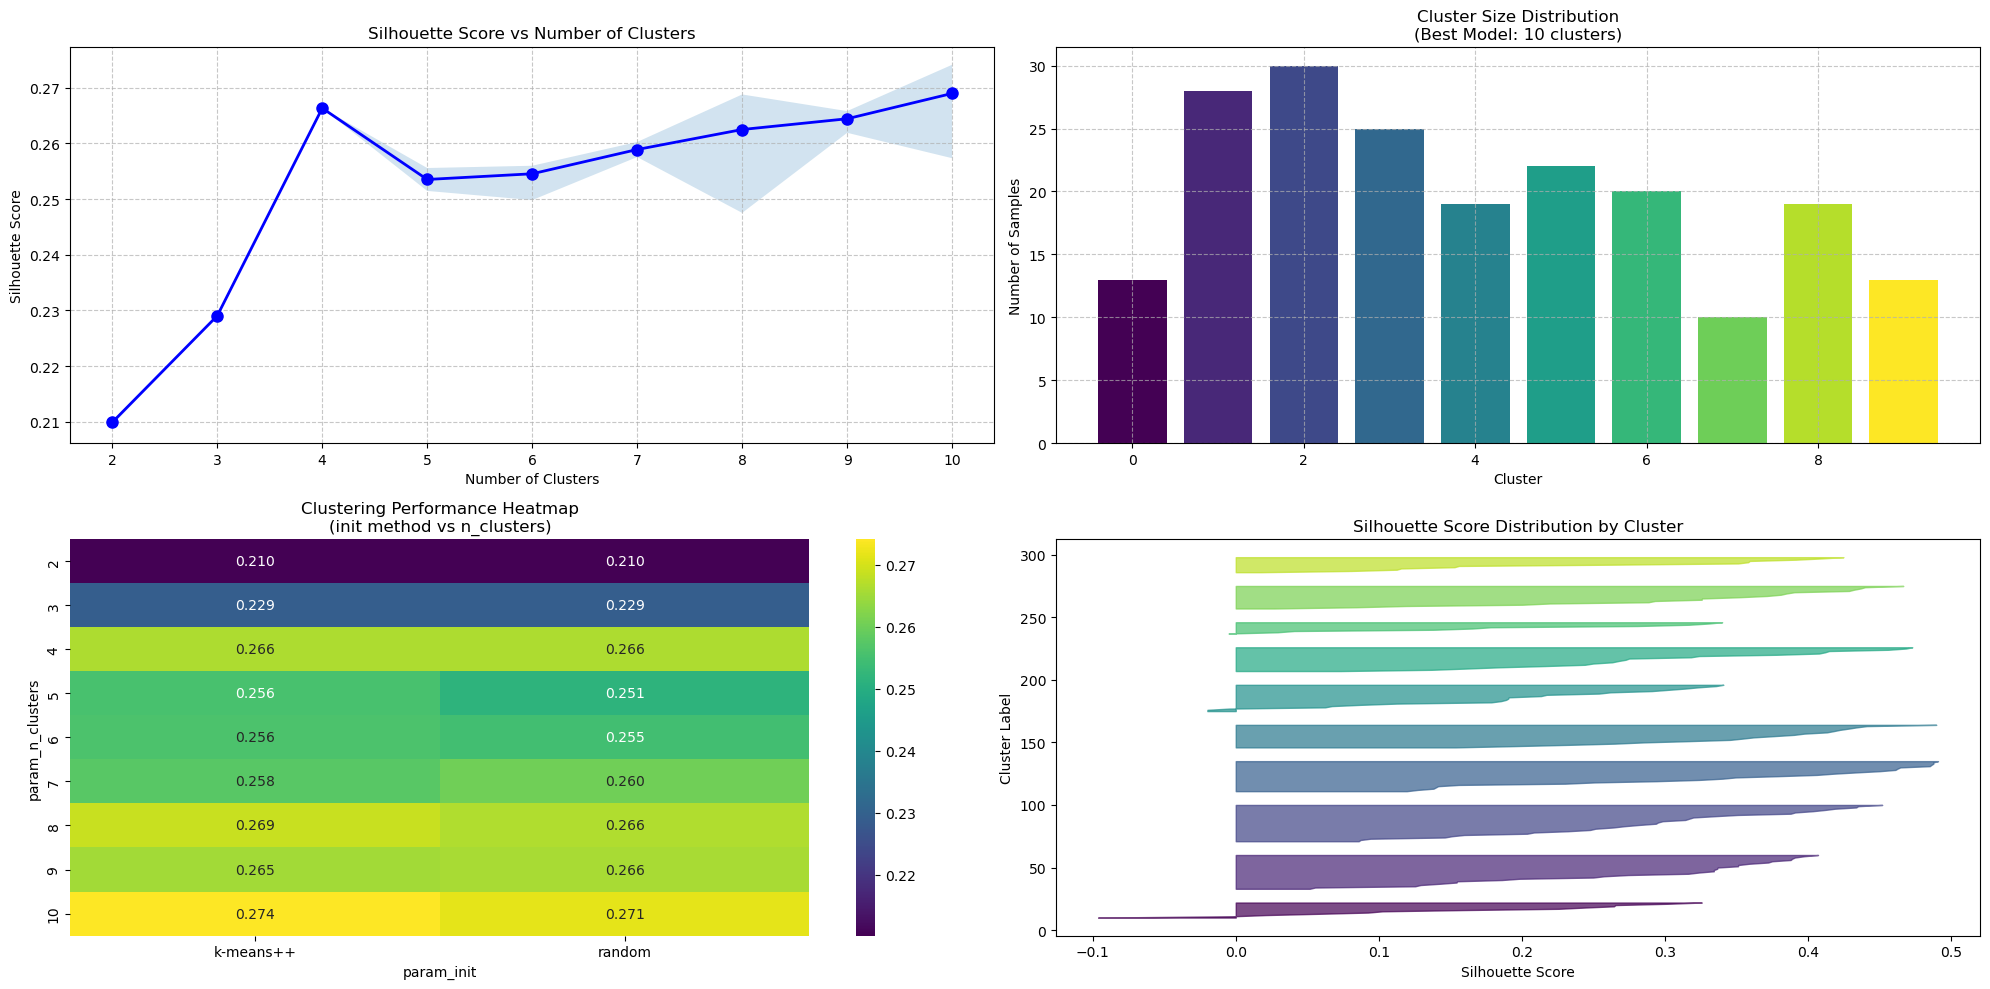


Best Parameters:
init: k-means++
max_iter: 200
n_clusters: 10
n_init: 10

Best Silhouette Score: 0.2741

Best davies_bouldin Score: 1.2458


In [49]:
from sklearn.metrics import silhouette_score, silhouette_samples


def plot_clustering_analysis(grid_search, scaled_features):
    results = pd.DataFrame(grid_search.cv_results_)

    plt.figure(figsize=(20, 10))
    
    # 1. Silhouette Score Analysis
    plt.subplot(2, 2, 1)
    cluster_scores = results.groupby('param_n_clusters')['mean_test_score'].mean()
    plt.plot(cluster_scores.index, cluster_scores.values, 'bo-', linewidth=2, markersize=8)
    plt.fill_between(cluster_scores.index, 
                     results.groupby('param_n_clusters')['mean_test_score'].min(),
                     results.groupby('param_n_clusters')['mean_test_score'].max(),
                     alpha=0.2)
    plt.title('Silhouette Score vs Number of Clusters', fontsize=12)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # 2. Best Model Cluster Distribution
    plt.subplot(2, 2, 2)
    best_labels = grid_search.best_estimator_.labels_
    cluster_sizes = pd.Series(best_labels).value_counts().sort_index()
    colors = plt.cm.viridis(np.linspace(0, 1, len(cluster_sizes)))
    plt.bar(range(len(cluster_sizes)), cluster_sizes, color=colors)
    plt.title(f'Cluster Size Distribution\n(Best Model: {grid_search.best_params_["n_clusters"]} clusters)', 
              fontsize=12)
    plt.xlabel('Cluster')
    plt.ylabel('Number of Samples')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # 3. Parameter Comparison Heatmap
    plt.subplot(2, 2, 3)
    pivot_scores = results.pivot_table(
        values='mean_test_score',
        index='param_n_clusters',
        columns='param_init',
        aggfunc='max'
    )
    sns.heatmap(pivot_scores, annot=True, fmt='.3f', cmap='viridis')
    plt.title('Clustering Performance Heatmap\n(init method vs n_clusters)', fontsize=12)
    
    # 4. Silhouette Score Distribution
    plt.subplot(2, 2, 4)
    best_silhouette_samples = silhouette_samples(scaled_features, best_labels)
    
    # Plot silhouette score distribution for each cluster
    y_lower = 10
    for i in range(grid_search.best_params_['n_clusters']):
        cluster_silhouette_scores = best_silhouette_samples[best_labels == i]
        cluster_silhouette_scores.sort()
        
        size_cluster_i = len(cluster_silhouette_scores)
        y_upper = y_lower + size_cluster_i
        
        color = plt.cm.viridis(float(i) / grid_search.best_params_['n_clusters'])
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                         0, cluster_silhouette_scores,
                         facecolor=color, edgecolor=color, alpha=0.7)
        
        y_lower = y_upper + 10
    
    plt.title('Silhouette Score Distribution by Cluster', fontsize=12)
    plt.xlabel('Silhouette Score')
    plt.ylabel('Cluster Label')
    
    plt.tight_layout()
    plt.show()
    print("\nBest Parameters:")
    for param, value in grid_search.best_params_.items():
        print(f"{param}: {value}")
    
    print(f"\nBest Silhouette Score: {grid_search.best_score_:.4f}")
    print(f"\nBest davies_bouldin Score: {ans['davies_bouldin']:.4f}")
    
    return grid_search.best_estimator_



best_model = plot_clustering_analysis(grid_search, scaled_features)
